# Load Two data

(256, 256, 3)


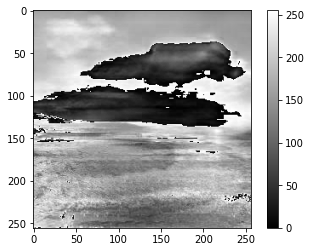

In [140]:
import os
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn

def normalize(input_x):
    return 255 * ((input_x - input_x.min()) / (input_x.max() - input_x.min()))

data_dir = './results/gaugan_atob_pix2pix/test_latest/images'

image_a = 'neutral_20210424_163747_real_A.png'
image_b = 'negative_20210424_172717_real_A.png'

image_a_arr = imageio.imread(os.path.join(data_dir, image_a))
image_b_arr = imageio.imread(os.path.join(data_dir, image_b))
image_a_b_mixed_arr = normalize(image_a_arr + image_b_arr)

print(image_a_arr.shape)
# plt.imshow(np.concatenate([image_a_arr, image_b_asrr, image_a_b_mixed_arr], 1))
plt.imshow(image_a_b_mixed_arr[:, :, 0], cmap='gray')
plt.colorbar()
plt.show()

# Extract Latent Vector

initialize network with normal


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 512, 2, 2]) torch.Size([1, 512, 2, 2]) torch.Size([1, 512, 2, 2])


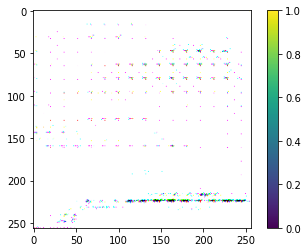

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


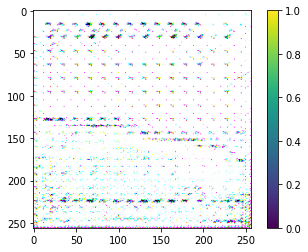

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


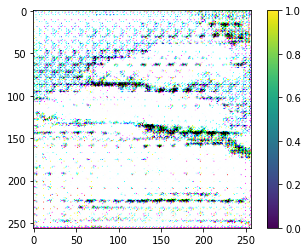

In [141]:
# load Encoder, Decoder(Generator)

from options.test_options import TestOptions
from models import networks
import cv2

def get_latent_value(generator, input_x: torch.Tensor):
    activation = {}
    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook

    latent_hook_layer = generator.model.model[1].model[3].model[3].model[3].model[3].model[3].model[3]
    latent_hook_layer.model.register_forward_hook(get_activation('latent'))
    output = generator(input_x).float()
    return activation['latent']

generator = networks.define_G(3, 3, 64, 'unet_256')
loaded_weight = torch.load("./checkpoints/gaugan_atob_pix2pix/latest_net_G.pth")

generator.load_state_dict(loaded_weight)
generator.eval()
with torch.no_grad():
#     image_a_label = cv2.cvtColor(image_a_arr, cv2.COLOR_BGR2GRAY)
#     image_a_label = np.reshape(image_a_label, (1, 1, 256, 256))
    image_a_label = np.expand_dims(np.transpose(image_a_arr, (2, 0, 1)), 0)
    image_a_gen = generator(torch.from_numpy(image_a_label).float())
    latent_a_value = get_latent_value(generator, torch.from_numpy(image_a_label).float())
    
    image_b_label = np.expand_dims(np.transpose(image_b_arr, (2, 0, 1)), 0)
    image_b_gen = generator(torch.from_numpy(image_b_label).float())
    latent_b_value = get_latent_value(generator, torch.from_numpy(image_b_label).float())
    
    image_ab_label = np.expand_dims(np.transpose(image_a_b_mixed_arr, (2, 0, 1)), 0)
    image_ab_gen = generator(torch.from_numpy(image_ab_label).float())
    latent_ab_value = get_latent_value(generator, torch.from_numpy(image_ab_label).float())
    
    latent_a_b_mixed_value = torch.lerp(latent_a_value, latent_b_value, 0.5)
    
    print(latent_a_value.size(), latent_b_value.size(), latent_a_b_mixed_value.size())

#     plt.imshow(np.transpose(image_a_gen.numpy()[0], (1, 2, 0)), cmap='gray')
    plt.imshow(np.transpose(normalize(image_a_gen.numpy())[0], (1, 2, 0)))
    plt.colorbar()
    plt.show()
    plt.close()
    
    plt.imshow(np.transpose(image_b_gen.numpy()[0], (1, 2, 0)))
    plt.colorbar()
    plt.show()
    plt.close()
    
    plt.imshow(np.transpose(image_ab_gen.numpy()[0], (1, 2, 0)))
    plt.colorbar()
    plt.show()
    plt.close()

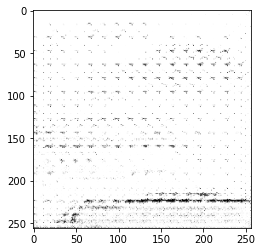

In [121]:
image_ab_gen.numpy().shape

gray = cv2.cvtColor(np.transpose(image_a_gen.numpy()[0], (1, 2, 0)), cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [94]:
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
        
    def forward(self, x):
        return x
    
generator.model.model[0] = Identity()

generator.model.model[1].model[0] = Identity()
generator.model.model[1].model[1] = Identity()
generator.model.model[1].model[2] = Identity()

generator.model.model[1].model[3].model[0] = Identity()
generator.model.model[1].model[3].model[1] = Identity()
generator.model.model[1].model[3].model[2] = Identity()

generator.model.model[1].model[3].model[3].model[0] = Identity()
generator.model.model[1].model[3].model[3].model[1] = Identity()
generator.model.model[1].model[3].model[3].model[2] = Identity()

generator.model.model[1].model[3].model[3].model[3].model[0] = Identity()
generator.model.model[1].model[3].model[3].model[3].model[1] = Identity()
generator.model.model[1].model[3].model[3].model[3].model[2] = Identity()

generator.model.model[1].model[3].model[3].model[3].model[3].model[0] = Identity()
generator.model.model[1].model[3].model[3].model[3].model[3].model[1] = Identity()
generator.model.model[1].model[3].model[3].model[3].model[3].model[2] = Identity()

generator.model.model[1].model[3].model[3].model[3].model[3].model[3].model[0] = Identity()
generator.model.model[1].model[3].model[3].model[3].model[3].model[3].model[1] = Identity()
generator.model.model[1].model[3].model[3].model[3].model[3].model[3].model[2] = Identity()
generator.model.model[1].model[3].model[3].model[3].model[3].model[3].model[3] = Identity()

In [99]:
generator(latent_a_b_mixed_value)

RuntimeError: Given groups=1, weight of size [64, 3, 4, 4], expected input[1, 512, 2, 2] to have 3 channels, but got 512 channels instead